In [1]:
import numpy as np;
import cv2 as cv;
import matplotlib.pyplot as plt

img = cv.imread('./assets/inputImg1.jpg');
if img is None:
    print("Error: Image not found.")
    exit()
print(f"Image converted to type : {type(img)}" )


Image converted to type : <class 'numpy.ndarray'>


*   Reading the image using OpenCV. Handled file not found situation.

In [2]:
gray_img = np.round(0.114 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.299 * img[:, :, 2]).astype(np.uint8)

*   Converting the 3D Numpy Array containing BGR Image to a 2D array containing the Grayscale Image.

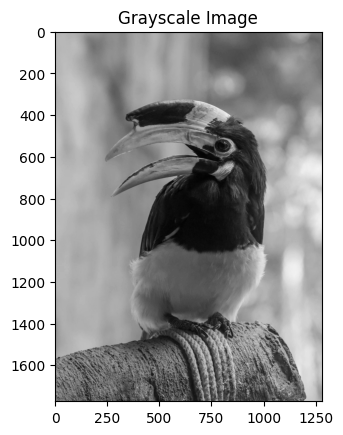

In [3]:
plt.imshow(gray_img, cmap='gray')
# plt.colorbar() 
plt.title('Grayscale Image')
# plt.axis('off')
plt.show()

*   Displaying and Exporting Grayscale Image.
*   Exporting uses OpenCV.

In [4]:
negative_img = 255-gray_img;
bright_img = np.clip(np.round(gray_img.astype(np.uint16) * 1.2), 0, 255).astype(np.uint8); # Avoiding overflow by converting to uint16
low_contrast_img = np.round(125+ ((10/51)*gray_img)).astype(np.uint8);
low_bpp_img = np.floor(gray_img/(16)).astype(np.uint8);  
vertical_mirror_img = np.array([arr[::-1] for arr in gray_img])


* Manipulating the grayscale image applying required point operations.

* `low_bpp_img` now has now 4 bit data logically. When plotting will have to scale this back to 0-255. Still the image will only have 4 bit worth actual data.

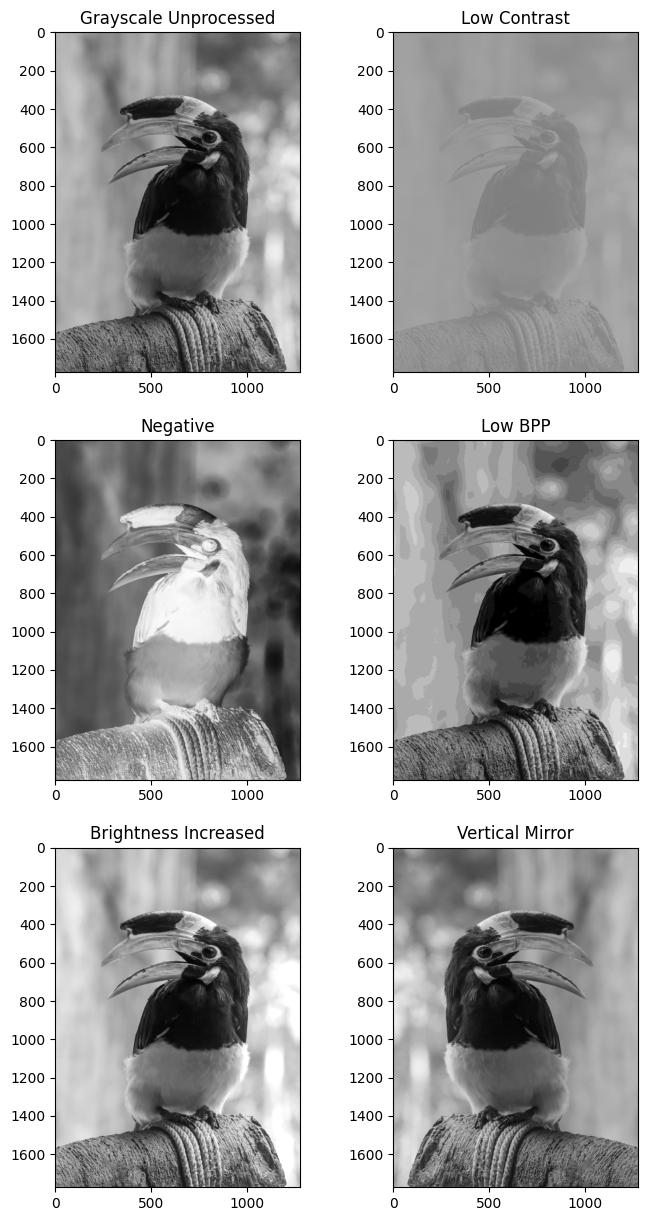

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 15));
axs[0,0].imshow(gray_img, cmap="gray", vmin=0,vmax=255);
axs[1,0].imshow(negative_img, cmap="gray", vmin=0,vmax=255);
axs[2,0].imshow(bright_img, cmap="gray", vmin=0,vmax=255);
axs[0,1].imshow(low_contrast_img, cmap="gray", vmin=0,vmax=255);
axs[1,1].imshow(low_bpp_img*(255/15), cmap="gray", vmin=0,vmax=255);
axs[2,1].imshow(vertical_mirror_img,cmap="gray", vmin=0,vmax=255 );


axs[0,0].set_title("Grayscale Unprocessed");
axs[1,0].set_title("Negative");
axs[2,0].set_title("Brightness Increased");
axs[0,1].set_title("Low Contrast");
axs[1,1].set_title("Low BPP");
axs[2,1].set_title("Vertical Mirror");

*   Displaying all the Numpy 2D arrays as Grayscale Images with titles.

*   Note:
    ```python
    axs[0,0].set_axis_off() 
    ```
    *   This will remove axes of [0,0] subplot.

In [6]:
cv.imwrite('subPlot11.jpg',gray_img ) # Saving as an image.
cv.imwrite('subPlot12.jpg',negative_img ) # Saving as an image.
cv.imwrite('subPlot13.jpg',bright_img ) # Saving as an image.
cv.imwrite('subPlot21.jpg',low_contrast_img ) # Saving as an image.
cv.imwrite('subPlot22.jpg',low_bpp_img*(255/15) ) # Saving as an image.
cv.imwrite('subPlot23.jpg',vertical_mirror_img ) # Saving as an image.

True

*   Saving the images.